# Imports

In [2]:
import os
import pandas as pd
import numpy as np
import math

## Data Process

In [345]:
Data = pd.read_csv(r"archive\movies_metadata.csv")
Data["genres"] = Data["genres"].apply(lambda x: " ".join([List["name"] for List in ast.literal_eval(x)]))
Data["vote_count"] = Data["vote_count"].fillna(0) #Fill na's for movies with no votes

C:\Users\tom.dawson\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning:

Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.



In [108]:
def DistributionPlot(Df, PlotVar):
    '''
    Plots the distribution of a given variable in a dataframe
    '''
    Labels = [i for i in range(0, 100, 10)]
    
    BinSize = Df[PlotVar].describe().loc["std"] / 20
    
    fig = ff.create_distplot(
            hist_data = [Df[PlotVar].values]
            , group_labels = [PlotVar]
            , bin_size=BinSize
            , show_hist=True)
    
    fig.update_xaxes(
    zeroline = True
    , showgrid = True
    , title=PlotVar)


    fig.update_yaxes(
        zeroline=True
        , showgrid=True
        , title="Distribution")


    fig.update_layout(
        title = dict(text=str(PlotVar) + " Distribution"
                     , font=dict(color="Black", size=20))
        , font = dict(color="Black", size=10)
        , height = 700
        , width = 1100
        , legend_title='Variable')

    fig.show(renderer='png', height=700, width=1100)

## EDA

In [109]:
#Quick Look
Data.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [111]:
#Most votes = Inception
Data[["original_title", "vote_average", "vote_count"]].sort_values("vote_count", ascending=False).head()

,original_title,vote_average,vote_count
15480,Inception,8.1,14075.0
12481,The Dark Knight,8.3,12269.0
14551,Avatar,7.2,12114.0
17818,The Avengers,7.4,12000.0
26564,Deadpool,7.4,11444.0


In [112]:
#Highest votes for movies above 1000 votes
Data[["original_title", "vote_average", "vote_count"]][Data["vote_count"]>=1000].sort_values("vote_average", ascending=False).head()

,original_title,vote_average,vote_count
834,The Godfather,8.5,6024.0
40251,君の名は。,8.5,1030.0
314,The Shawshank Redemption,8.5,8358.0
292,Pulp Fiction,8.3,8670.0
1184,Once Upon a Time in America,8.3,1104.0


In [113]:
#Average of 100 votes per movie
#Average of 5.6/10 for rating
#Most movies between 5 and 7 rating (Imagine it's hard to get 0 or 10)
#Alot of movies with a small amount of votes
Data[["vote_count", "vote_average"]].describe()

,vote_count,vote_average
count,45466.000000,45460.000000
mean,109.882836,5.618207
std,491.279576,1.924216
min,0.000000,0.000000
25%,3.000000,5.000000
50%,10.000000,6.000000
75%,34.000000,6.800000
max,14075.000000,10.000000


In [120]:
Data[Data["vote_count"] > 0][["vote_count", "vote_average"]].describe()

,vote_count,vote_average
count,42561.000000,42561.000000
mean,117.382886,6.000886
std,506.901699,1.287769
min,1.000000,0.000000
25%,4.000000,5.300000
50%,11.000000,6.100000
75%,38.000000,6.800000
max,14075.000000,10.000000


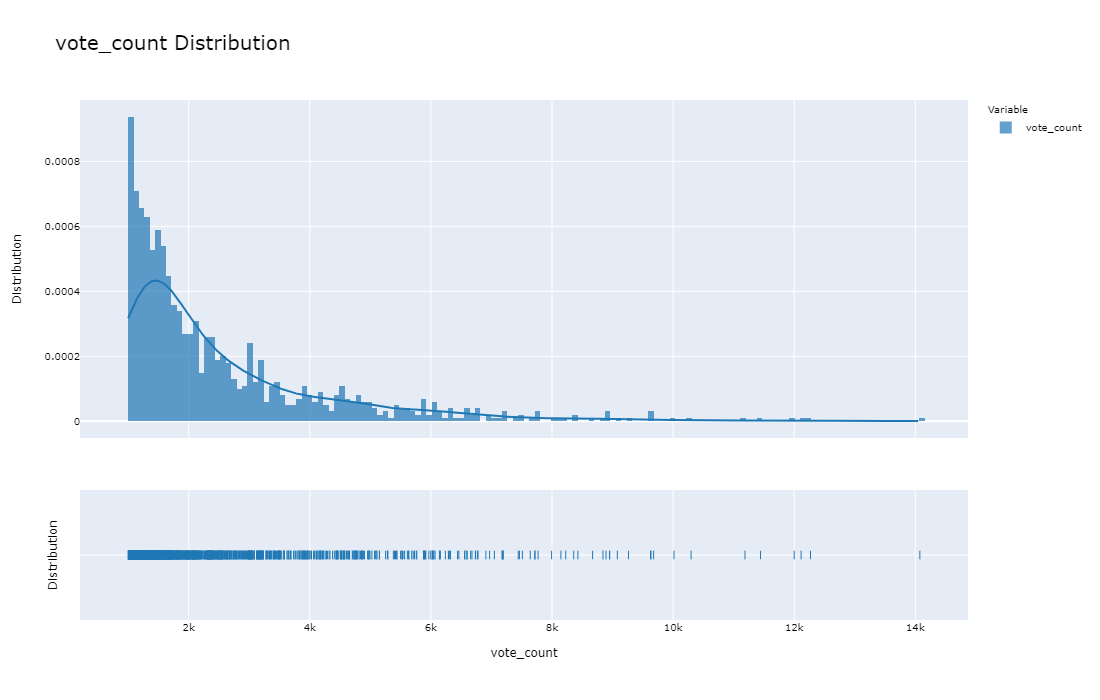

In [115]:
#Want to visualise the distribution of vote counts and avergae
DistributionPlot(Data[Data["vote_count"] >= 1000], "vote_count")

In [274]:
#Only want to consider relatively popular hits already
#Let's say we will use only the top 10% of movies
#Must have 160 votes to be considered for the charts

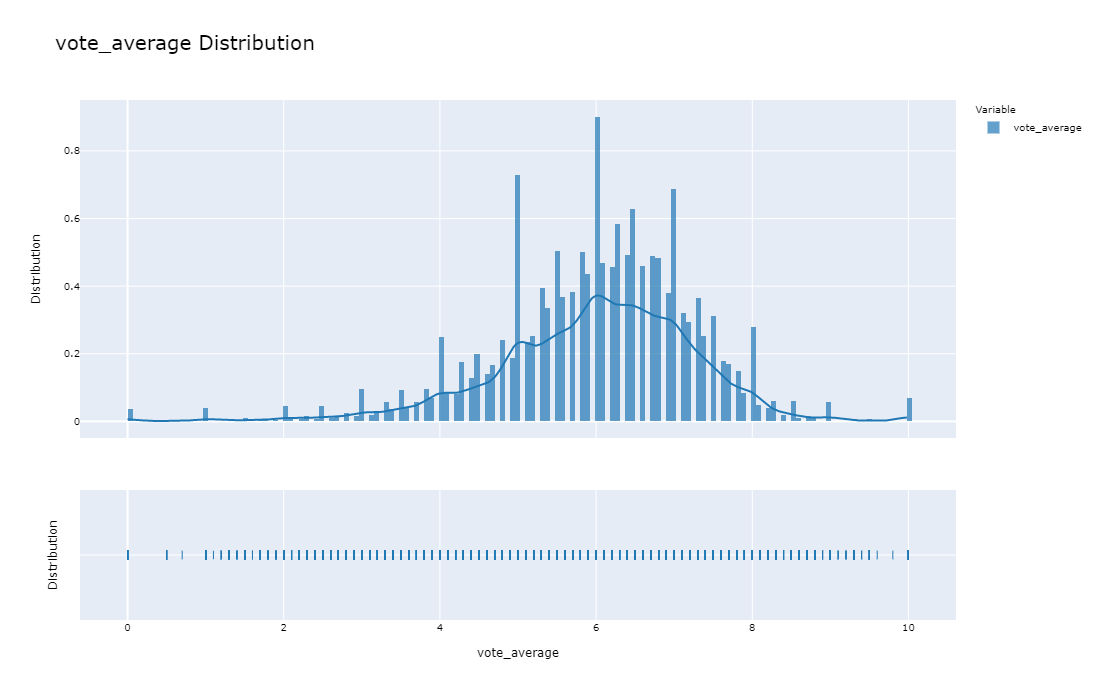

In [277]:
DistributionPlot(Data[Data["vote_count"] > 0][["vote_average"]], "vote_average")

In [142]:
#Weighted rating gives higher weight to rating of a move that has a lot of votes, conversely, gives a higher rating
#to the average movie rating for movies with lower number of ratings.

#Intuitively makes sense because a movie with a small number of ratings is more likely to be average whereas a movie 
#with many ratings is more likely to be it's actually rating.

#Can see this in a similar way to imputing null values with the mean - the closer a movie is to having no ratings, 
#the more likely it is to be the mean of the sample (assumes movies with no ratings are the mean of all ratings).

#The more evidence for a movies rating, the less likely it is to be the mean of the sample.

## Simple Popularity Recommendation

In [278]:
def WeightedRating(Df, Num_Recomms = 5):
    
    Temp = Df.copy()
    MinVotes = pd.qcut(Temp["vote_count"], 10, duplicates="drop").values.value_counts().index[9].left
    Temp = Temp[Temp["vote_count"] > MinVotes]
    
    RatingWeight = Df["vote_count"] / (Df["vote_count"] + MinVotes)
    AverageWeight = MinVotes / (Df["vote_count"] + MinVotes)
    
    Temp["weighted_ratings"] = RatingWeight*Temp["vote_average"] + Temp["vote_average"].mean()*AverageWeight
    DistributionPlot(Temp[["weighted_ratings"]], "weighted_ratings")
    
    return Temp.sort_values("weighted_ratings", ascending=False)[["original_title", "vote_count", "vote_average"]].head(Num_Recomms)

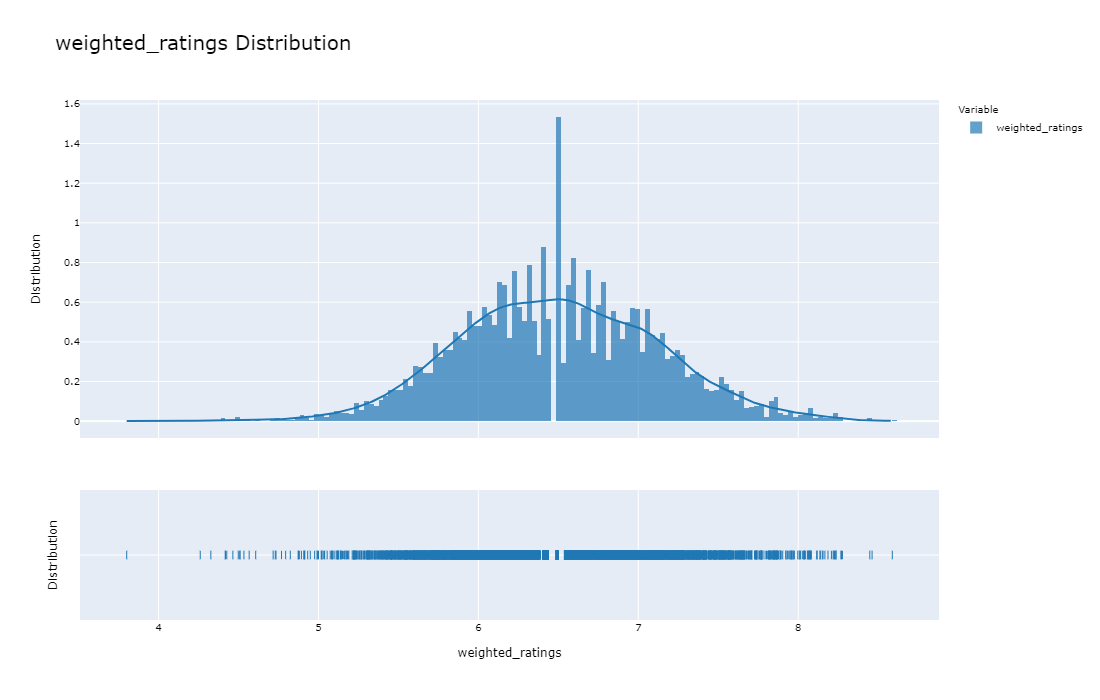

,original_title,vote_count,vote_average
10309,Dilwale Dulhania Le Jayenge,661.0,9.1
314,The Shawshank Redemption,8358.0,8.5
834,The Godfather,6024.0,8.5
12481,The Dark Knight,12269.0,8.3
2843,Fight Club,9678.0,8.3


In [279]:
WeightedRating(Data)

In [152]:
#With not genre specification you can sort the weighted ratings and pick the top few
#Let's say we want to recommend 5 movies

#Top movie is Dilwale Dulhania Le Jayenge

In [273]:
#Now want to be able to specify a genre, imagine a setting where a person is looking only for one particular type of movie
#which is dependant on their current mood

#Only want to consider relatively popular hits already
#Let's say we will use only the top 10% of movies

## Popularity Recommendation by Genre

In [301]:
def WeightedRatingByGenre(Df, Genre):
    
    Temp = Data.copy()
    Temp = Temp[Temp["genres"].str.contains(Genre)]
    MinVotes = pd.qcut(Temp["vote_count"], 20, duplicates="drop").values.value_counts().index[-1].left
    
    Temp = Temp[Temp["vote_count"] > MinVotes]
    
    RatingWeight = Temp["vote_count"] / (Temp["vote_count"] + MinVotes)
    AverageWeight = MinVotes / (Temp["vote_count"] + MinVotes)
    
    Temp["weighted_ratings"] = RatingWeight*Temp["vote_average"] + Temp["vote_average"].mean()*AverageWeight
    DistributionPlot(Temp, "weighted_ratings")
    
    return Temp.sort_values("weighted_ratings", ascending=False)[["original_title", "vote_count", "vote_average"]].head(5)

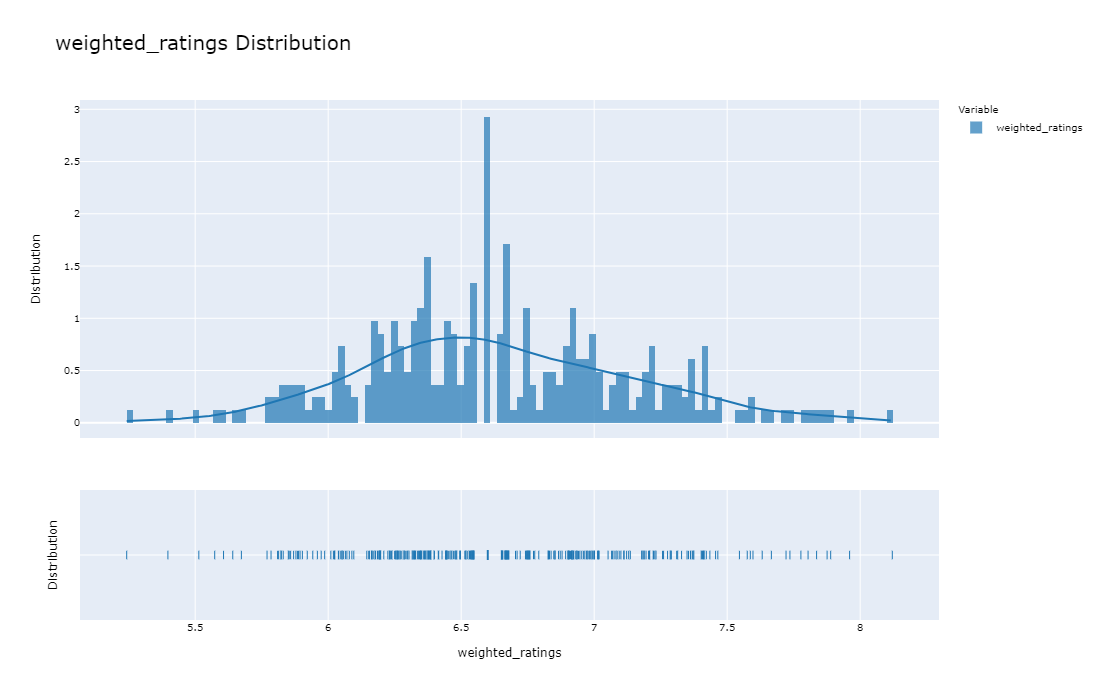

,original_title,vote_count,vote_average
12481,The Dark Knight,12269.0,8.3
15480,Inception,14075.0,8.1
1154,The Empire Strikes Back,5998.0,8.2
7000,The Lord of the Rings: The Return of the King,8226.0,8.1
256,Star Wars,6778.0,8.1


In [302]:
WeightedRatingByGenre(Data, "Action")

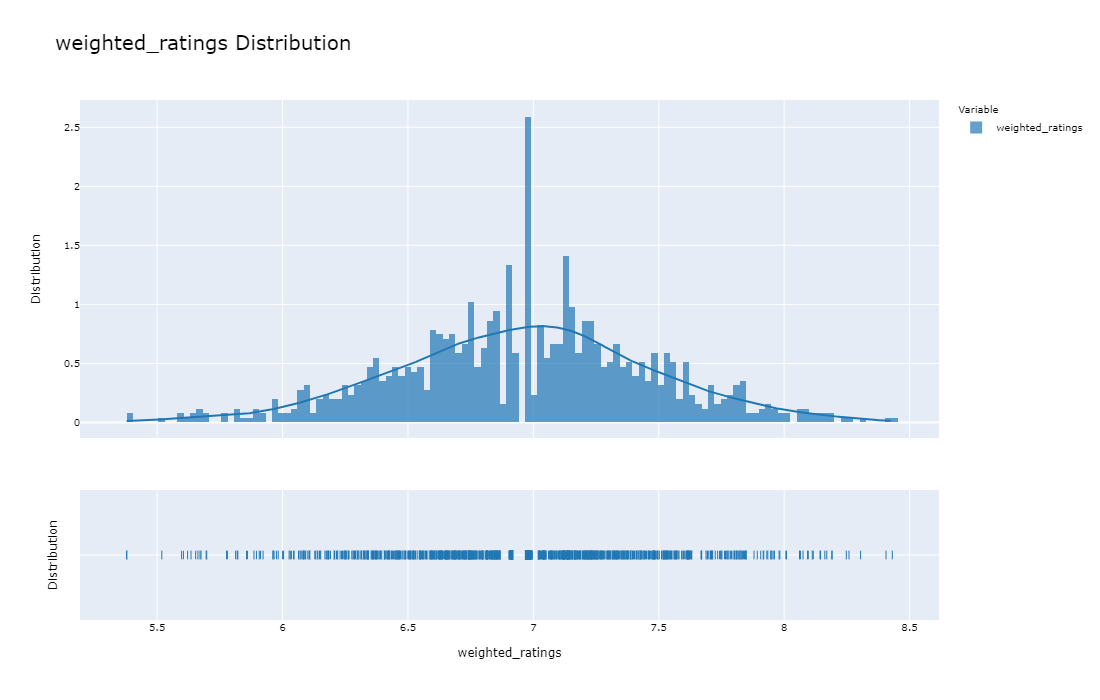

,original_title,vote_count,vote_average
314,The Shawshank Redemption,8358.0,8.5
834,The Godfather,6024.0,8.5
10309,Dilwale Dulhania Le Jayenge,661.0,9.1
12481,The Dark Knight,12269.0,8.3
2843,Fight Club,9678.0,8.3


In [303]:
WeightedRatingByGenre(Data, "Drama")

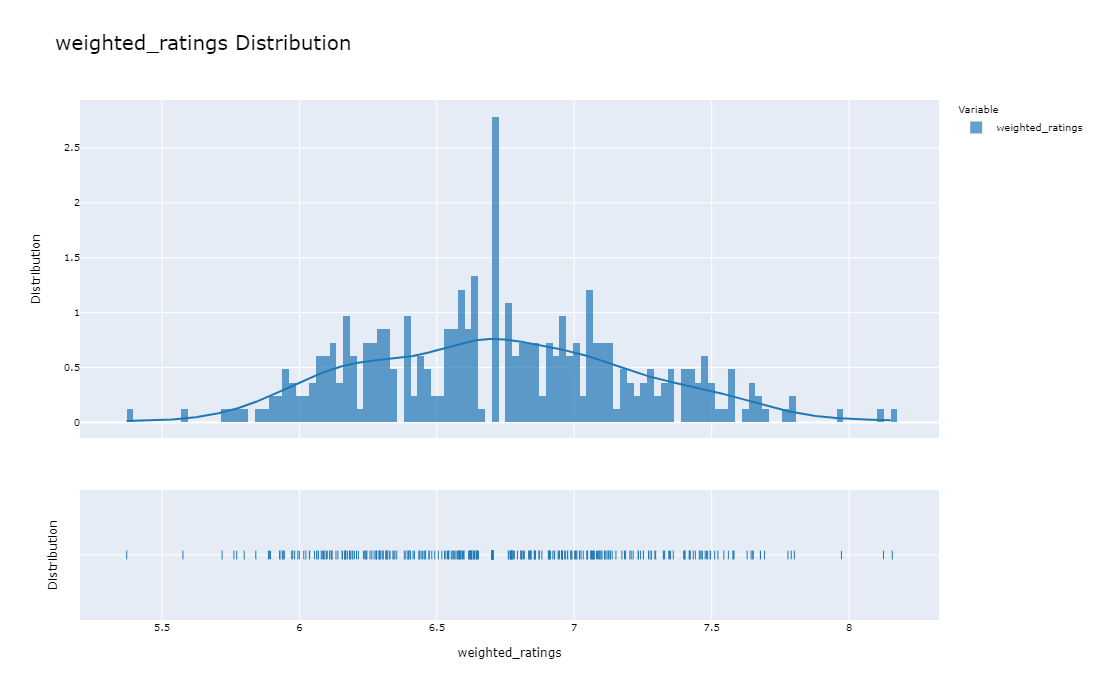

,original_title,vote_count,vote_average
10309,Dilwale Dulhania Le Jayenge,661.0,9.1
351,Forrest Gump,8147.0,8.2
40251,君の名は。,1030.0,8.5
40882,La La Land,4745.0,7.9
22168,Her,4215.0,7.9


In [304]:
WeightedRatingByGenre(Data, "Romance")

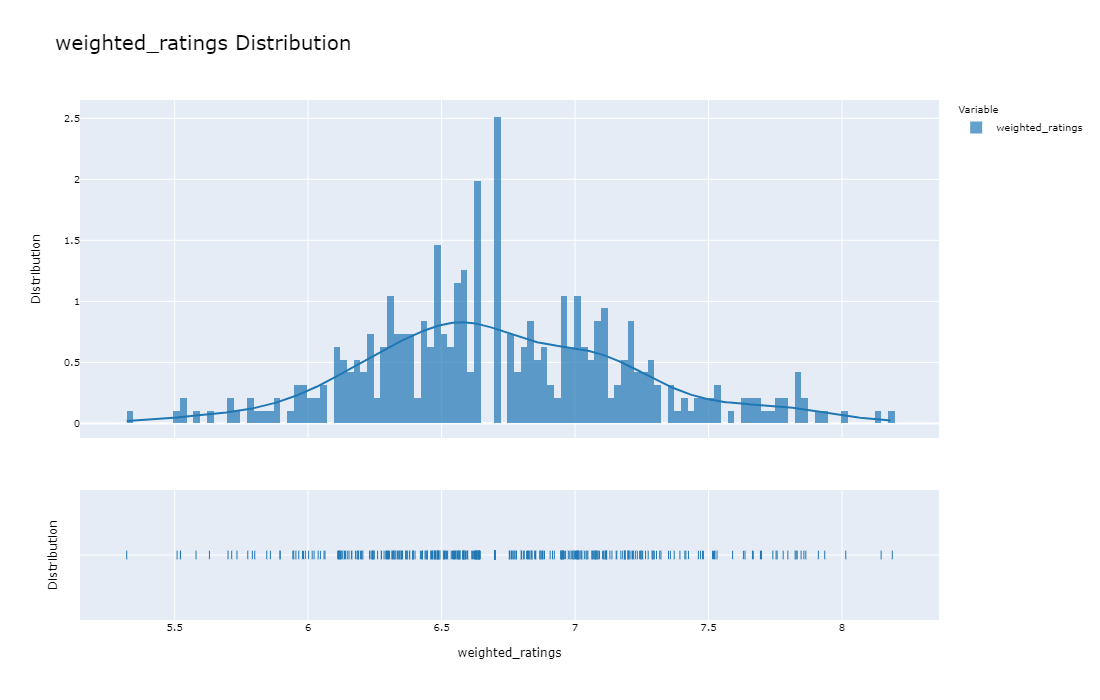

,original_title,vote_count,vote_average
12481,The Dark Knight,12269.0,8.3
292,Pulp Fiction,8670.0,8.3
15480,Inception,14075.0,8.1
289,Léon,4293.0,8.2
46,Se7en,5915.0,8.1


In [305]:
WeightedRatingByGenre(Data, "Thriller")

This algorithm only recommends the top movies in each genre, and will do the same for everyone, what we really want is 
an algorithm that can recommend products based on user preference